In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tilemapbase
tilemapbase.start_logging()

In [2]:
# tilemapbase.init(create=True)

In [3]:
df1 = pd.read_csv('data/kaiterra_fieldeggid_locations.csv', index_col=[0])
df1['Type'] = 'Kaiterra'
df2 = pd.read_csv('data/govdata/govdata_locations.csv', index_col=[0])
df2['Type'] = 'Govt'

In [4]:
df = pd.merge(df1, df2, how='outer', on=['Monitor ID', 'Latitude', 'Longitude', 'Location', 'Type'], copy=False)

In [5]:
df

,Latitude,Longitude,Location,Type
Monitor ID,,,,
BB4A,28.554980,77.194430,Jamun,Kaiterra
91B8,28.503050,77.185660,Vihara,Kaiterra
BC46,28.632950,77.288700,Segel Design,Kaiterra
BFDC,28.521083,77.214237,Arundhati,Kaiterra
D804,28.558230,77.208620,EPoD,Kaiterra
72CA,28.455966,77.315964,Lejo,Kaiterra
CBC7,28.601407,77.185708,U.S. Embassy,Kaiterra
20CA,28.574575,77.161071,Arun Duggal,Kaiterra
C0A7,28.415079,77.043530,Nischal,Kaiterra


(28.415079, 28.7500499)
(77.03254129999999, 77.372281)
28.588432487096764 77.20127194516131


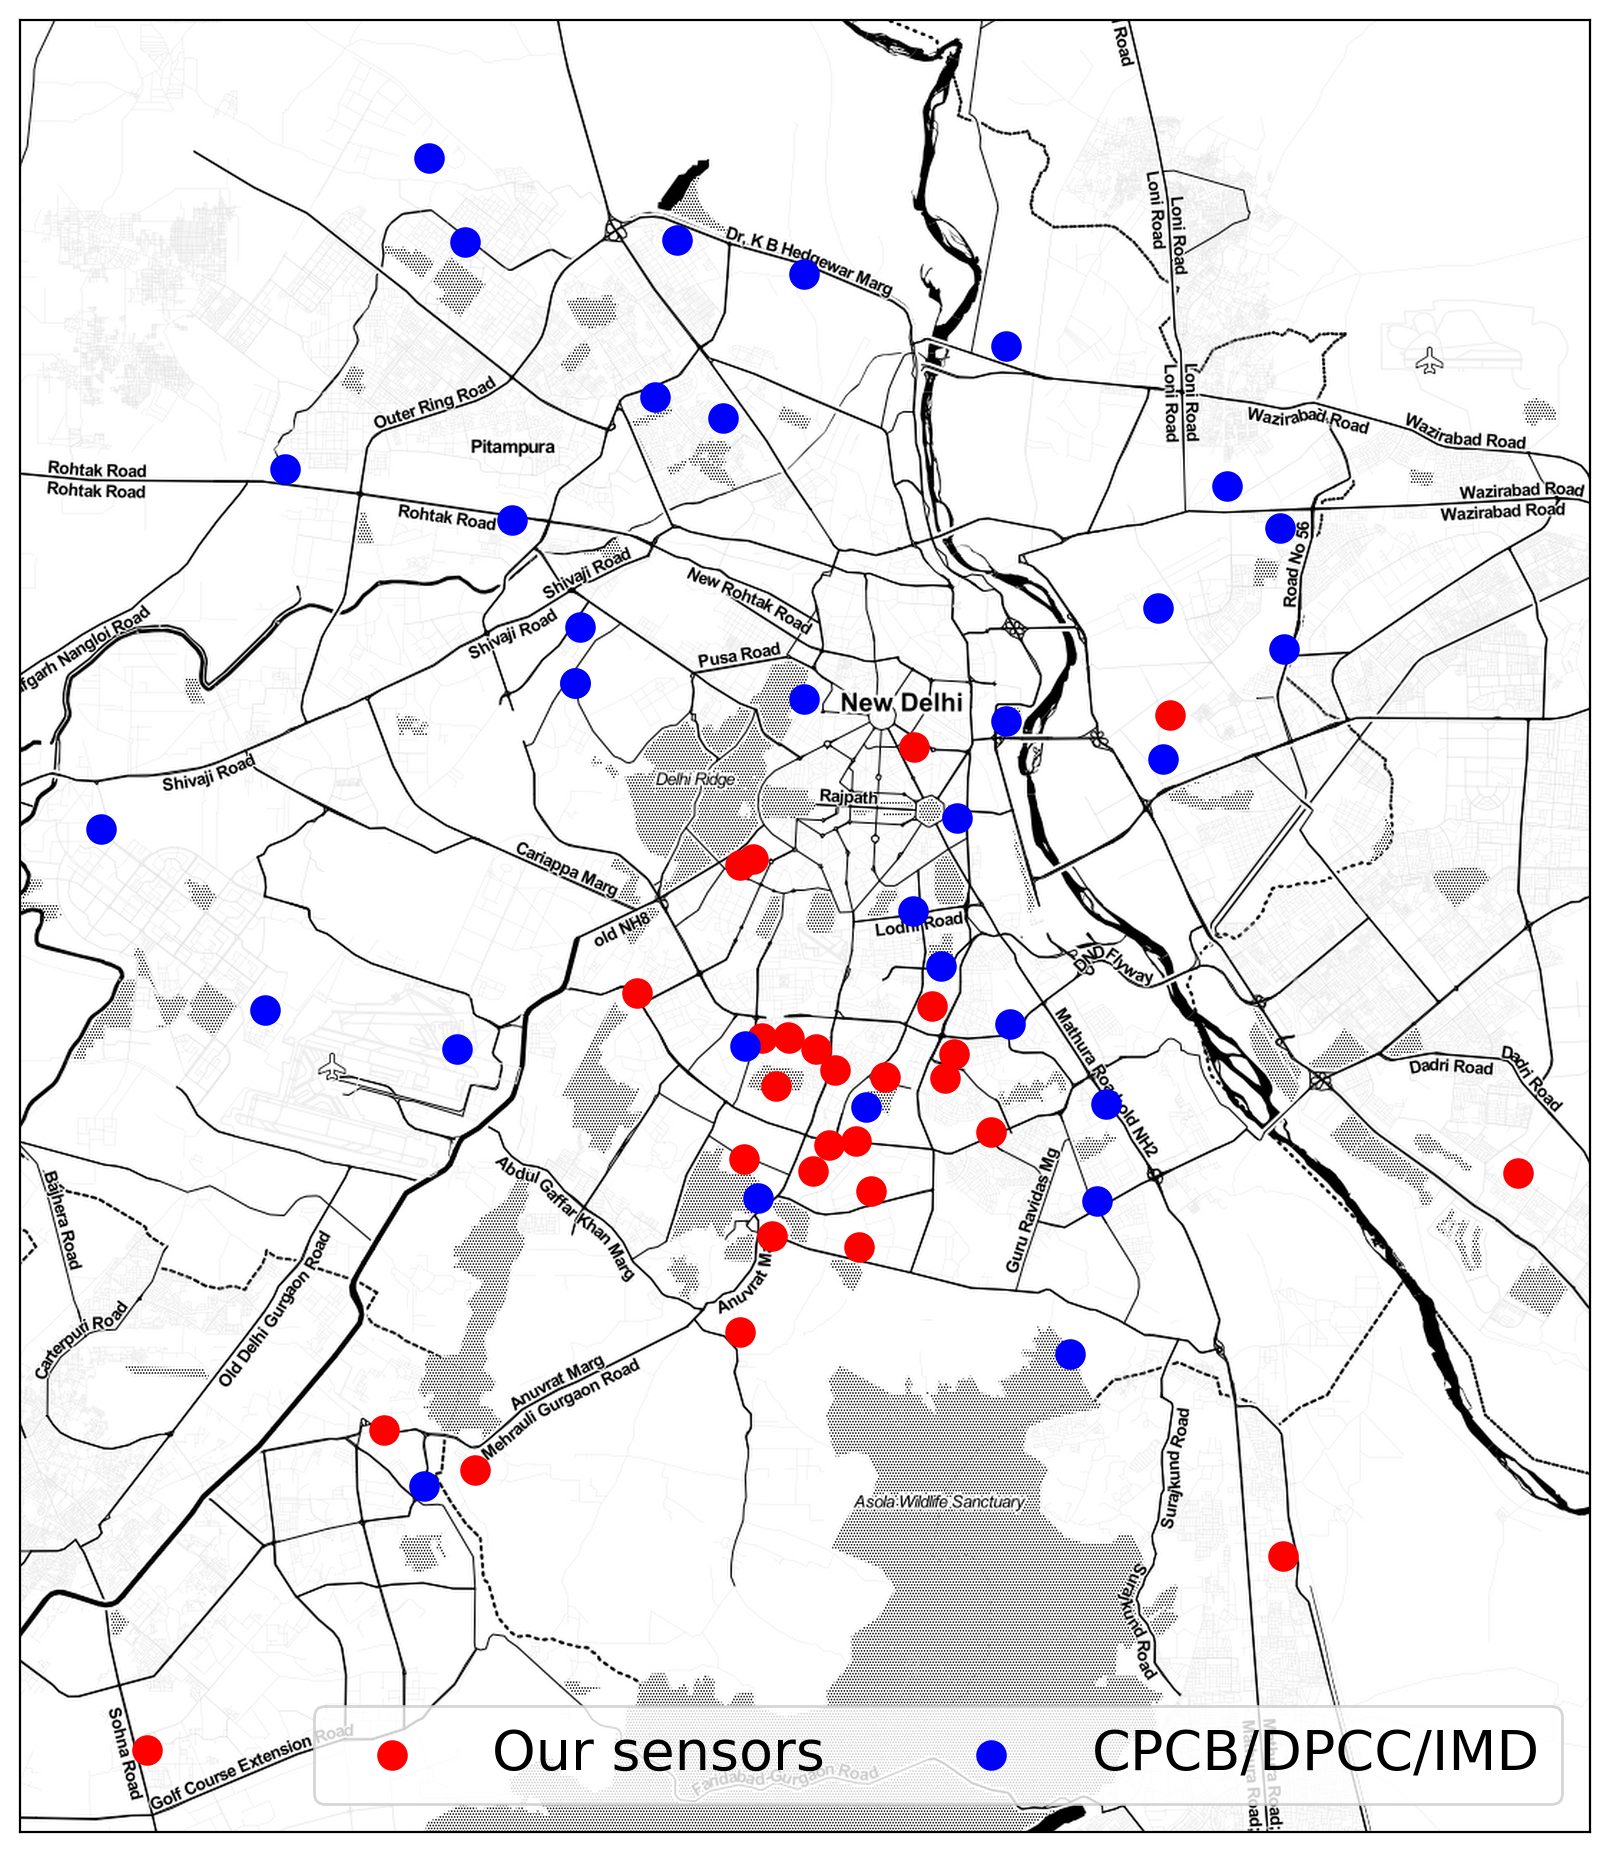

In [6]:
lat_lims = df.Latitude.min(), df.Latitude.max()
lon_lims = df.Longitude.min(), df.Longitude.max()
lon_center, lat_center = df.Longitude.mean(), df.Latitude.mean()

print(lat_lims)
print(lon_lims)
print(lat_center, lon_center)

lat_pad = 1.1 * max(lat_center - lat_lims[0], lat_lims[1] - lat_center)
lon_pad = 1.1 * max(lon_center - lon_lims[0], lon_lims[1] - lon_center)
    
extent = tilemapbase.Extent.from_lonlat(lon_center - lon_pad, 
                                        lon_center + lon_pad, 
                                        lat_center - lat_pad, 
                                        lat_center + lat_pad)
# extent = tilemapbase.Extent.from_lonlat(lon_lims[0], lon_lims[1], lat_lims[0], lat_lims[1])

# extent = extent.to_aspect(1.0)
extent_proj = extent.to_project_3857

# use openstreetmap (OSM)
# t = tilemapbase.tiles.Stamen_Toner_Background
t = tilemapbase.tiles.Stamen_Toner

colordict = {'Kaiterra':'r', 'Govt':'b'}

plt.rc('font', size=20)

fig, ax = plt.subplots(figsize=(12,12), dpi=200)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

for row in df.itertuples():
    x, y = tilemapbase.project(row.Longitude, row.Latitude)
    if row.Type == 'Kaiterra':
        obj1 = ax.scatter(x, y, marker='.', color='r', s=400, label='Our sensors')
    else:
        obj2 = ax.scatter(x, y, marker='.', color='b', s=400, label='CPCB/DPCC/IMD')
    # ax.text(x, y, row._3[:2], fontsize=12, color='b', withdash=True)

ax.legend((obj1, obj2), (obj1.get_label(), obj2.get_label()), loc='lower right', ncol=2)
# fig.savefig('locs_map.pdf')
plt.show()

In [7]:
fig.tight_layout()
fig.savefig('data/locs_map.pdf')

In [8]:
plt.close()